<h1>Download the Dataset</h1>
<p>Download the Dataset from the following link: 
https://www.kaggle.com/mirichoi0218/insurance/download</>

<h1>Import Libraries</h1>

In [20]:
#data manipulation
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sb

#data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#data selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

#data modeling
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#data performance
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_squared_error


<h1>Reading the Dataset</h1>
<ul>
<li>Read the dataset into a Pandas DataFrame.</li>
<li>Drop if there are missing values.</li>
</ul>

### Reading insurance dataset

In [21]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Check variables data types in the dataset

In [22]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<p>We can conclude:</p>
<ul>
    <li>There are 1338 observations of 7 variables in the dataset</li>
    <li>3 categoricals and 4 numericals</li>
    <li>2 integers and 2 floats</li>
</ul>

### Numerical variables statistics

In [23]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<h1>EDA on Numerical columns</h1>
<p>Numerical columns include 'age', 'bmi', and 'charges'.</p>

###  Histogram Distribution of Attributes

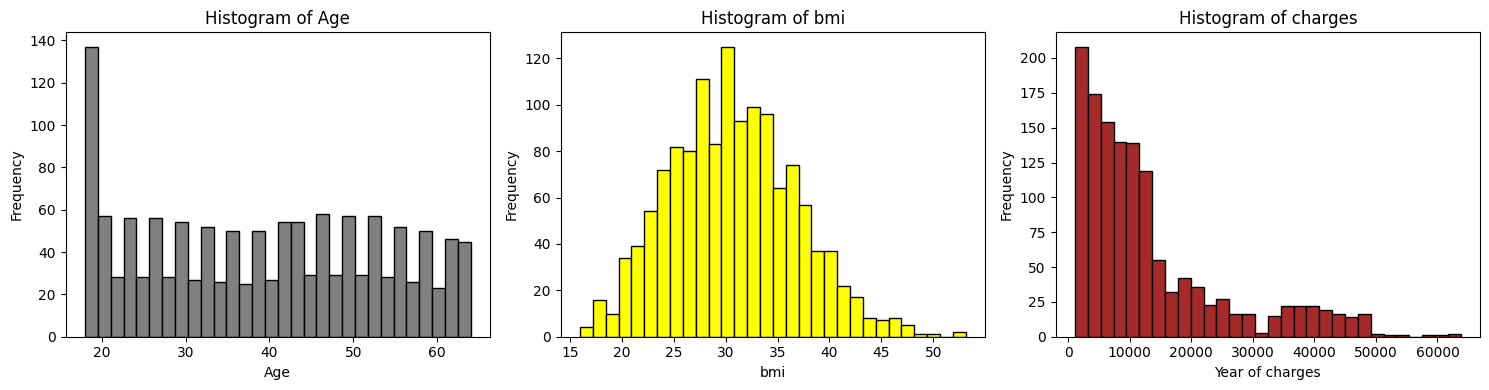

In [24]:
# Create a figure and axis object with 1 rows and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 rows, 3 columns

# Plot histograms for each variable
axes[0].hist(insurance['age'], bins=30, color='grey', edgecolor='black')
axes[0].set_title('Histogram of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

axes[1].hist( insurance['bmi'], bins=30, color='yellow', edgecolor='black')
axes[1].set_title('Histogram of bmi')
axes[1].set_xlabel('bmi')
axes[1].set_ylabel('Frequency')

axes[2].hist(insurance['charges'], bins=30, color='brown', edgecolor='black')
axes[2].set_title('Histogram of charges')
axes[2].set_xlabel('Year of charges')
axes[2].set_ylabel('Frequency')


# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

<p>We can conclude:</p>
<ul>
<li>'age' is almost uniform distributed except 'age' under 20</li>
<li>'bmi' is almost normal distributed</li>
<li>'charges' is right skewed</li>
</ul>

### Box Plot for the 5 point summary and the outliers if any

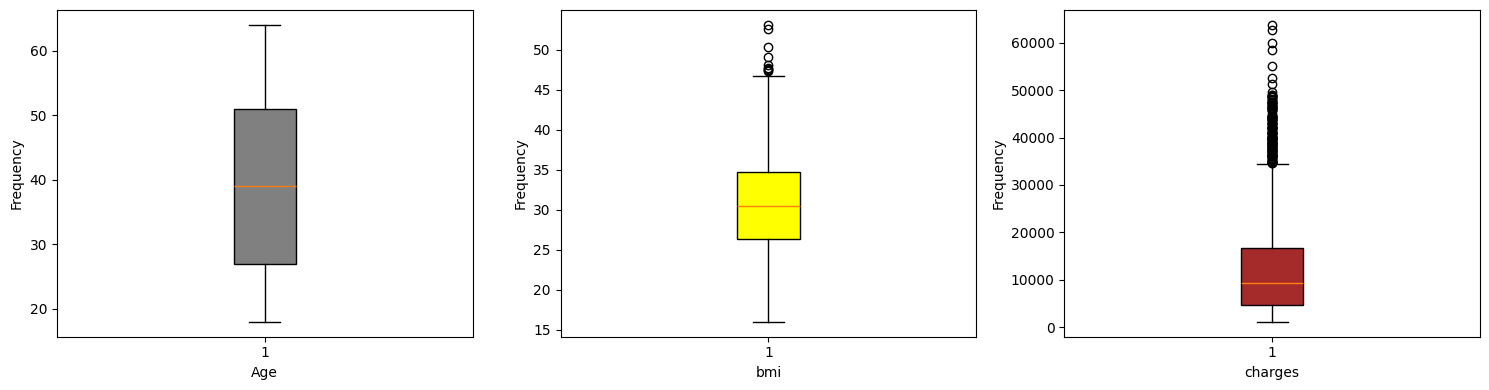

In [25]:
# Create a figure and axis object with 1 rows and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 rows, 3 columns

# Plot histograms for each variable
axes[0].boxplot(insurance['age'], patch_artist=True, boxprops=dict(facecolor='grey', color='black'))
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

axes[1].boxplot(insurance['bmi'], patch_artist=True, boxprops=dict(facecolor='yellow', color='black'))
axes[1].set_xlabel('bmi')
axes[1].set_ylabel('Frequency')

axes[2].boxplot(insurance['charges'], patch_artist=True, boxprops=dict(facecolor='brown', color='black'))
axes[2].set_xlabel('charges')
axes[2].set_ylabel('Frequency')


# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

<p>We can conclude, there are outliers on:</p>
<ul>
<li>'bmi' variable</li>
<li>'charge' variable</li>
</ul>

###  Removing the outliers

In [26]:
'''
#define a function to deal with outliers
print('shape before removing outliers:', insurance.shape)
def remove_outliers(df, columns, threshold = 1.5):
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        df = df[(df[column] >= q1 - threshold * (q3 - q1)) & (df[column] <= q3 + threshold * (q3 - q1))]
    return df

columns = ['bmi', 'charges']
row = insurance.shape[0]
diff = np.inf
while diff > 0:
    insurance = remove_outliers(insurance, columns)
    diff = row - insurance.shape[0]
    row = insurance.shape[0]
print('shape after removing outliers:', insurance.shape)

'''

"\n#define a function to deal with outliers\nprint('shape before removing outliers:', insurance.shape)\ndef remove_outliers(df, columns, threshold = 1.5):\n    for column in columns:\n        q1 = df[column].quantile(0.25)\n        q3 = df[column].quantile(0.75)\n        df = df[(df[column] >= q1 - threshold * (q3 - q1)) & (df[column] <= q3 + threshold * (q3 - q1))]\n    return df\n\ncolumns = ['bmi', 'charges']\nrow = insurance.shape[0]\ndiff = np.inf\nwhile diff > 0:\n    insurance = remove_outliers(insurance, columns)\n    diff = row - insurance.shape[0]\n    row = insurance.shape[0]\nprint('shape after removing outliers:', insurance.shape)\n\n"

###  Box Plot after removing the outliers

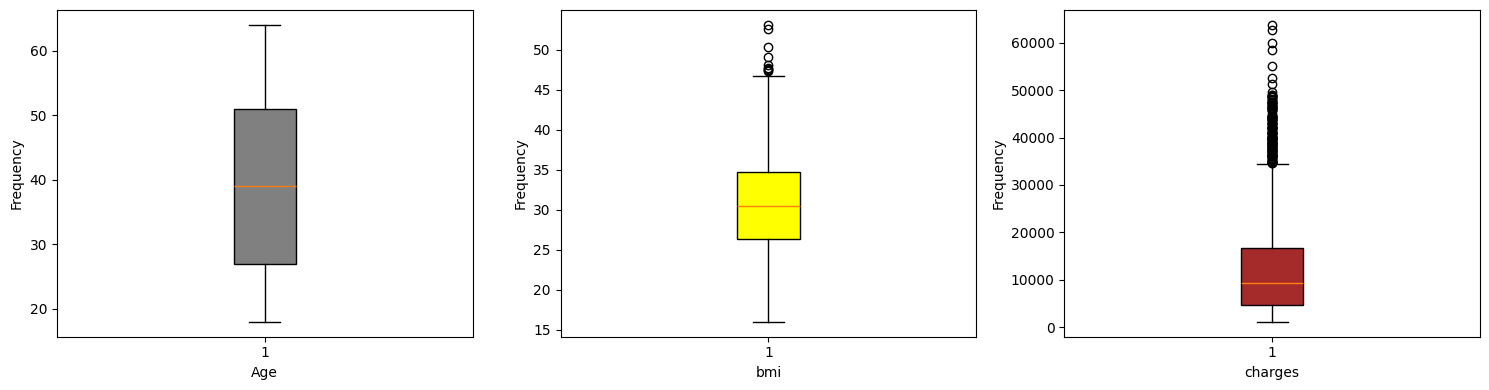

In [27]:
# Create a figure and axis object with 1 rows and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 rows, 3 columns

# Plot histograms for each variable
axes[0].boxplot(insurance['age'], patch_artist=True, boxprops=dict(facecolor='grey', color='black'))
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

axes[1].boxplot(insurance['bmi'], patch_artist=True, boxprops=dict(facecolor='yellow', color='black'))
axes[1].set_xlabel('bmi')
axes[1].set_ylabel('Frequency')

axes[2].boxplot(insurance['charges'], patch_artist=True, boxprops=dict(facecolor='brown', color='black'))
axes[2].set_xlabel('charges')
axes[2].set_ylabel('Frequency')


# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

<h1>EDA on categorical columns</h1>
<p>Categorical variables:</p>
<ul>				
<li>sex</li>
<li>children</li>
<li>smoker</li>
<li>region</li>
</ul>

C:\Users\mariah\AppData\Local\Temp\ipykernel_10128\2227348781.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(ax=ax, x=category, data=insurance, palette='Set2', width=0.3)
C:\Users\mariah\AppData\Local\Temp\ipykernel_10128\2227348781.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')
C:\Users\mariah\AppData\Local\Temp\ipykernel_10128\2227348781.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(ax=ax, x=category, data=insurance, palette='Set2', width=0.3)
C:\Users\mariah\AppData\Local\Temp\ipykernel_10128\2227348781.py:11: UserWarning

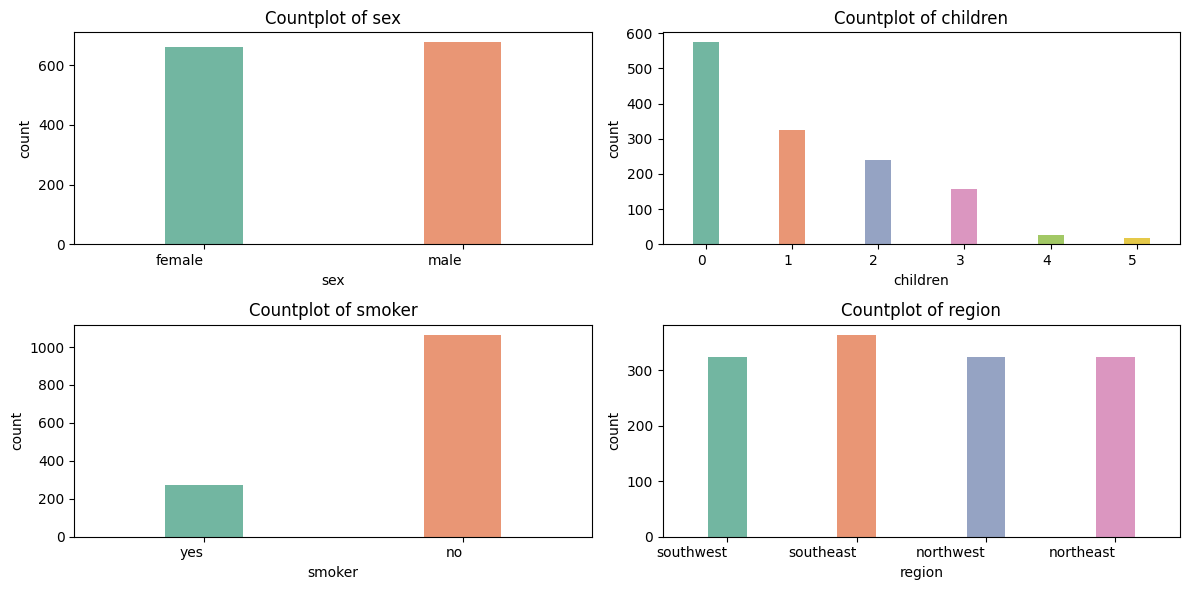

In [28]:
# Create a figure and axis object with 2 rows and 2 columns (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# List of categorical variables for easy iteration
categories = ['sex', 'children', 'smoker', 'region']
# Loop to create a countplot for each categorical variable
for i, category in enumerate(categories):
    ax = axes[i // 2, i % 2]  # Determine position in the 4x2 grid
    sb.countplot(ax=ax, x=category, data=insurance, palette='Set2', width=0.3)
    ax.set_title(f'Countplot of {category}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

<h1>Scalling and Encoding variables</h1>

### Normalizing numerical variables

In [29]:
scaler = StandardScaler()
insurance[['age', 'bmi', 'charges']] = scaler.fit_transform(insurance[['age', 'bmi', 'charges']] )
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,female,-0.453320,0,yes,southwest,0.298584
1,-1.509965,male,0.509621,1,no,southeast,-0.953689
2,-0.797954,male,0.383307,3,no,southeast,-0.728675
3,-0.441948,male,-1.305531,0,no,northwest,0.719843
4,-0.513149,male,-0.292556,0,no,northwest,-0.776802


### Encoding categorical variables

In [30]:
encoder = LabelEncoder()
insurance['sex'] = encoder.fit_transform(insurance[['sex']])

encoder = LabelEncoder()
insurance['smoker'] = encoder.fit_transform(insurance[['smoker']])

encoder = OneHotEncoder(sparse_output=False) 
encoded_region = encoder.fit_transform(insurance[['region']])

encoded_region_df = pd.DataFrame(encoded_region, columns=encoder.categories_[0])
insurance = pd.concat([insurance, encoded_region_df], axis=1)

insurance.drop('region', axis = 1, inplace=True)
insurance.head()

e:\AI_ML_ROBOGARDEN\LABORATORY\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\AI_ML_ROBOGARDEN\LABORATORY\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,-1.438764,0,-0.453320,0,1,0.298584,0.0,0.0,0.0,1.0
1,-1.509965,1,0.509621,1,0,-0.953689,0.0,0.0,1.0,0.0
2,-0.797954,1,0.383307,3,0,-0.728675,0.0,0.0,1.0,0.0
3,-0.441948,1,-1.305531,0,0,0.719843,0.0,1.0,0.0,0.0
4,-0.513149,1,-0.292556,0,0,-0.776802,0.0,1.0,0.0,0.0


In [31]:
insurance.isna().sum()

age          0
sex          0
bmi          0
children     0
smoker       0
charges      0
northeast    0
northwest    0
southeast    0
southwest    0
dtype: int64

In [32]:
insurance.dropna(inplace=True)
insurance.isna().sum()

age          0
sex          0
bmi          0
children     0
smoker       0
charges      0
northeast    0
northwest    0
southeast    0
southwest    0
dtype: int64

<h1>Relationships between features</h1>

### Plot Correlation between all variables

<Axes: >

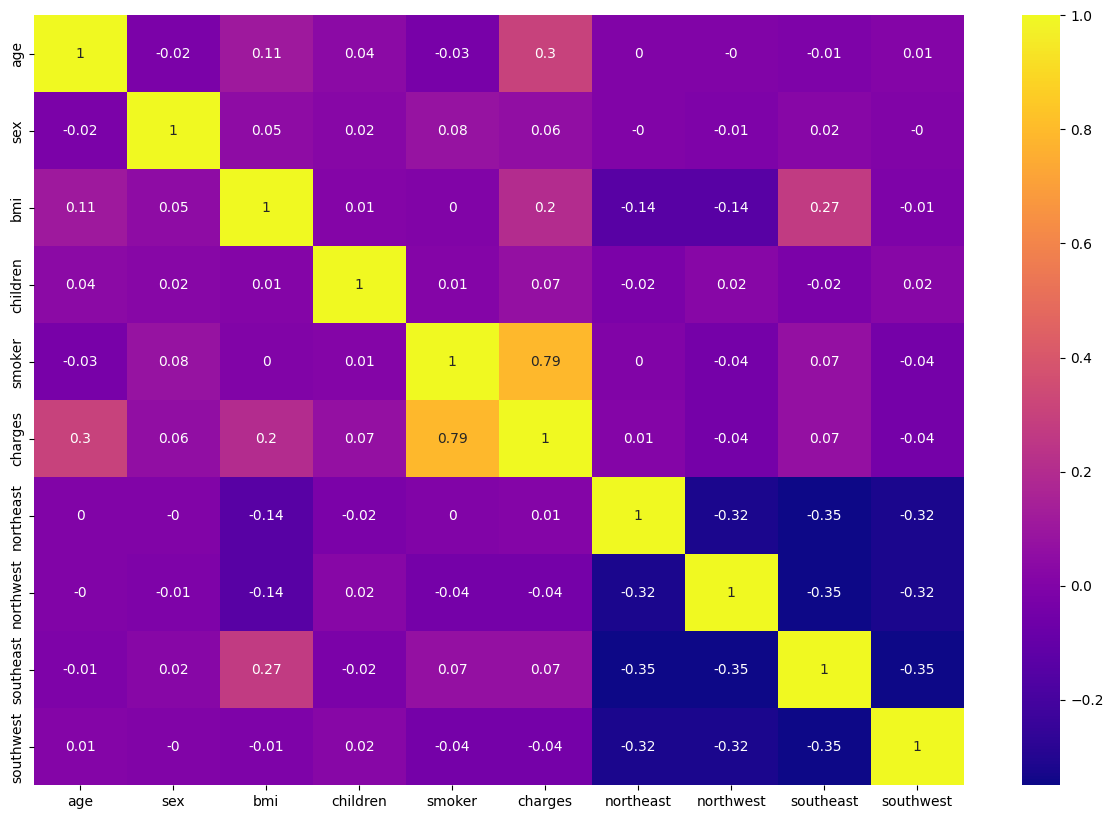

In [33]:
#figure size
fig = plt.figure(figsize = (15, 10))

#plot correlation between variables
sb.heatmap(insurance.corr().round(2), annot = True, cmap='plasma')

<p>We can conclude:</p>
<ul>
<li>'age', 'smoker' and 'bmi' are the 3 most correlatated to the 'charges'</li> 
<li>hence, we can make prediction of 'charges' based on these 3 factors.</li>
</ul>

 ### Pairplot the relationships between numerical variables

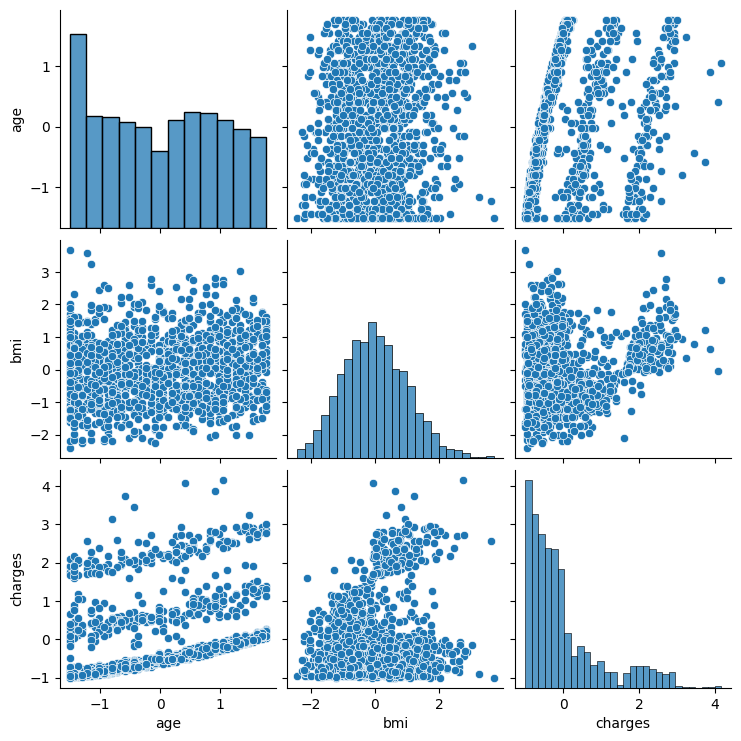

In [34]:
# Check correlation using pairplot
sb.pairplot(insurance[['age', 'bmi', 'charges']])

<p>we can conclude:</p>
<ul>
<li>'age' is highly correlated to 3 levels of 'charges' even the global correlation between those two variable shows low</li>
<li>'bmi' has low correlation with 'age'</li>
</ul>

<h2>Splitting the Data</h2>
<ul>
    <li>80% training set.</li>
    <li>20% test set.</li>
</ul>

In [35]:
# Separate futures and Target

#target
y = insurance['charges']
y_full = y

#full features
X_full = insurance.drop('charges', axis = 1)

#selected futures
X = insurance[['age', 'smoker', 'bmi']]

#Split features to train and test values for reduced features dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Split features to train and test values for full dataset
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_full, y_full, test_size=0.20, random_state=42)

<h1>Training models</h1>
<ul>
<li>we will use decision trees, random forests and SVRs to fit your data.</li>
<li>Get r2 scores, MSE scores and MAE scores</li>
<li>We need a minimum r2 score of 82%.</li>
<li>Compare the results of different models.</li>
</ul>

<p>Hint: We need to choose the optimal value for k using cross-validation.</p>

### DecisionTreeRegressor

e:\AI_ML_ROBOGARDEN\LABORATORY\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
225 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
57 fits failed with the following error:
Traceback (most recent call last):
  File "e:\AI_ML_ROBOGARDEN\LABORATORY\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\AI_ML_ROBOGARDEN\LABORATORY\.venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "e:\AI_ML_ROBOGARDEN\LABORATORY\.venv\Lib\site-packages\sk

Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}


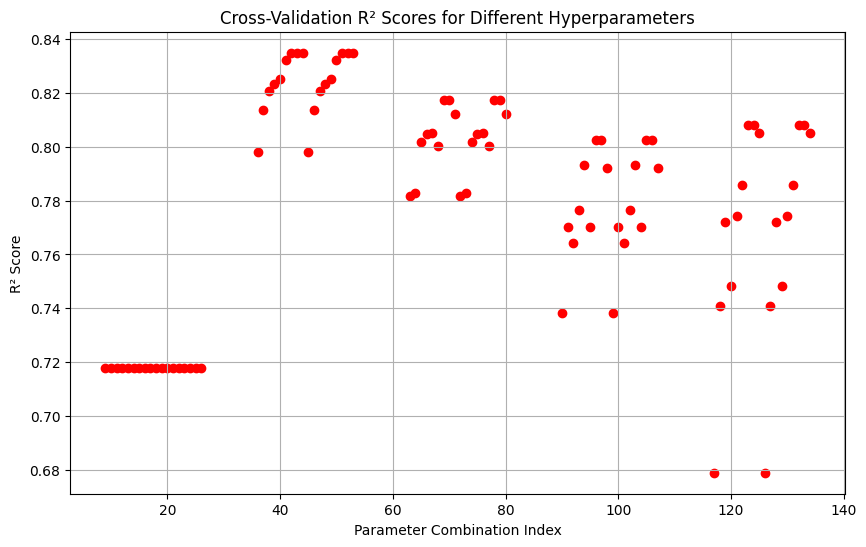

Best R² Score from Cross-Validation: 0.8348510060153649
Mean Squared Error on Test Set: 16.02%
R² Score on Test Set: 84.88%
Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}


In [45]:

# Initialize the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=0)

# Define the hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],  # Different tree depths to test
    'min_samples_split': [2, 5, 10],   # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],     # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Maximum features to consider at each split
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, 
                           scoring='r2', cv=5, n_jobs=-1)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Get the R² scores from the GridSearchCV results
results = grid_search.cv_results_

# Plot the R² scores for different parameter combinations
mean_test_scores = results['mean_test_score']
params = results['params']

# Create a DataFrame for easy visualization
cv_results_df = pd.DataFrame(params)
cv_results_df['mean_test_score'] = mean_test_scores

# Plot the R² scores for each combination of parameters
plt.figure(figsize=(10, 6))
plt.scatter(range(len(cv_results_df)), cv_results_df['mean_test_score'], color='red')
plt.title("Cross-Validation R² Scores for Different Hyperparameters")
plt.xlabel("Parameter Combination Index")
plt.ylabel("R² Score")
plt.grid(True)
plt.show()

# Display the best R² score
best_r2_score = grid_search.best_score_
print(f"Best R² Score from Cross-Validation: {best_r2_score}")

# Train the model with the best parameters
best_regressor = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_regressor.predict(X_test)

# Calculate Mean Squared Error and R² on the test set
mse = mean_squared_error(y_test, y_pred)
r2_test = best_regressor.score(X_test, y_test)

print(f"Mean Squared Error on Test Set: {mse*100:.2f}%")
print(f"R² Score on Test Set: {r2_test*100:.2f}%")
print(f"Best parameters: {grid_search.best_params_}")

### Random Forest Regressor

##### selected features

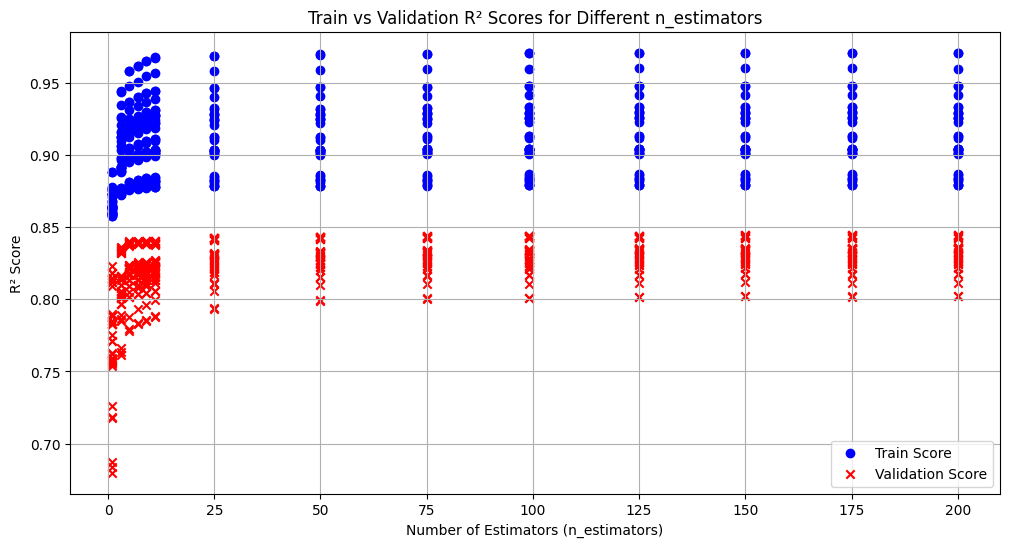

Mean Squared Error on Test Set: 13.89%
R² Score on Test Set: 86.89%
Best parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [37]:


# Initialize the Random Forest Regressor
regressor = RandomForestRegressor(random_state=0)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [1, 3, 5, 7, 9, 11, 25, 50, 75, 99, 125, 150, 175, 200],  # Number of trees
    'max_depth': [5, 10, 15, None],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples required at each leaf node
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, 
                           scoring='r2', cv=5, n_jobs=-1, return_train_score=True)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Extract the results from the GridSearchCV object
results = grid_search.cv_results_

# Plot the R² scores for each combination of hyperparameters
plt.figure(figsize=(12, 6))

# Plot training scores
plt.scatter(results['param_n_estimators'], results['mean_train_score'], marker='o', label='Train Score', color='blue')

# Plot validation scores
plt.scatter(results['param_n_estimators'], results['mean_test_score'], marker='x', label='Validation Score', color='red')

plt.title("Train vs Validation R² Scores for Different n_estimators")
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.show()

# Get the best model from GridSearchCV
best_regressor = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_regressor.predict(X_test)

# Calculate Mean Squared Error and R² on the test set
mse = mean_squared_error(y_test, y_pred)
r2_test = best_regressor.score(X_test, y_test)

print(f"Mean Squared Error on Test Set: {mse*100:.2f}%")
print(f"R² Score on Test Set: {r2_test*100:.2f}%")
print(f"Best parameters: {grid_search.best_params_}")

##### Full features

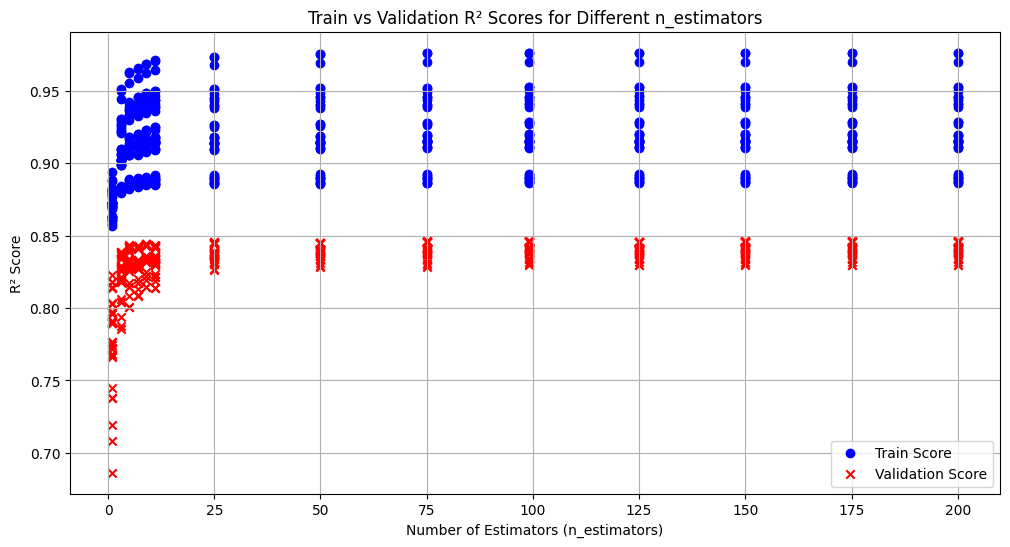

Mean Squared Error on Test Set: 13.12%
R² Score on Test Set: 87.62%
Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 99}


In [38]:


# Initialize the Random Forest Regressor
regressor = RandomForestRegressor(random_state=0)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [1, 3, 5, 7, 9, 11, 25, 50, 75, 99, 125, 150, 175, 200],  # Number of trees
    'max_depth': [5, 10, 15, None],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples required at each leaf node
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, 
                           scoring='r2', cv=5, n_jobs=-1, return_train_score=True)

# Fit GridSearchCV to the data
grid_search.fit(X_full_train, y_full_train)

# Extract the results from the GridSearchCV object
results = grid_search.cv_results_

# Plot the R² scores for each combination of hyperparameters
plt.figure(figsize=(12, 6))

# Plot training scores
plt.scatter(results['param_n_estimators'], results['mean_train_score'], marker='o', label='Train Score', color='blue')

# Plot validation scores
plt.scatter(results['param_n_estimators'], results['mean_test_score'], marker='x', label='Validation Score', color='red')

plt.title("Train vs Validation R² Scores for Different n_estimators")
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.show()

# Get the best model from GridSearchCV
best_regressor = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_regressor.predict(X_full_test)

# Calculate Mean Squared Error and R² on the test set
mse = mean_squared_error(y_full_test, y_pred)
r2_test = best_regressor.score(X_full_test, y_full_test)

print(f"Mean Squared Error on Test Set: {mse*100:.2f}%")
print(f"R² Score on Test Set: {r2_test*100:.2f}%")
print(f"Best parameters: {grid_search.best_params_}")

### SVR regression

##### Selected features

{'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}


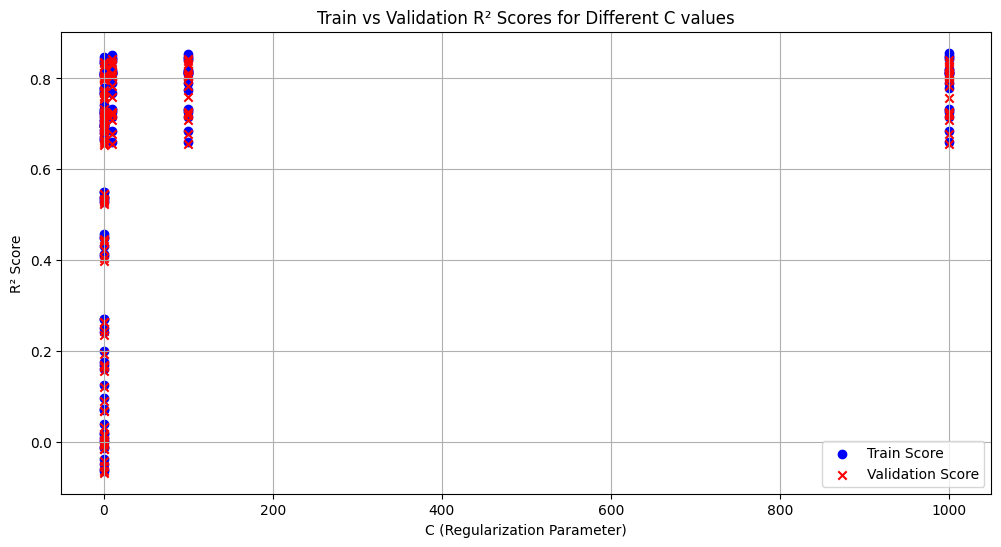

Mean Squared Error on Test Set: 14.70%
R² Score on Test Set: 86.12%
Best parameters: {'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}


In [39]:

# Initialize the SVR model
svr = SVR()

# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],               # Regularization parameter
    'epsilon': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],     # Epsilon parameter
    'kernel': ['linear', 'poly', 'rbf'],   # Different kernel types to test
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, 
                           scoring='r2', cv=5, n_jobs=-1, return_train_score=True)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

# Extract the results from the GridSearchCV object
results = grid_search.cv_results_

# Plot the R² scores for different combinations of C, epsilon, and kernel
plt.figure(figsize=(12, 6))

# Plot training scores
plt.scatter(results['param_C'], results['mean_train_score'], marker='o', label='Train Score', color='blue')

# Plot validation scores
plt.scatter(results['param_C'], results['mean_test_score'], marker='x', label='Validation Score', color='red')

plt.title("Train vs Validation R² Scores for Different C values")
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.show()

# Get the best model from GridSearchCV
best_svr = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_svr.predict(X_test)

# Calculate Mean Squared Error and R² on the test set
mse = mean_squared_error(y_test, y_pred)
r2_test = best_svr.score(X_test, y_test)

print(f"Mean Squared Error on Test Set: {mse*100:.2f}%")
print(f"R² Score on Test Set: {r2_test*100:.2f}%")
print(f"Best parameters: {grid_search.best_params_}")

##### Full features

{'C': 1000, 'epsilon': 0.2, 'kernel': 'poly'}


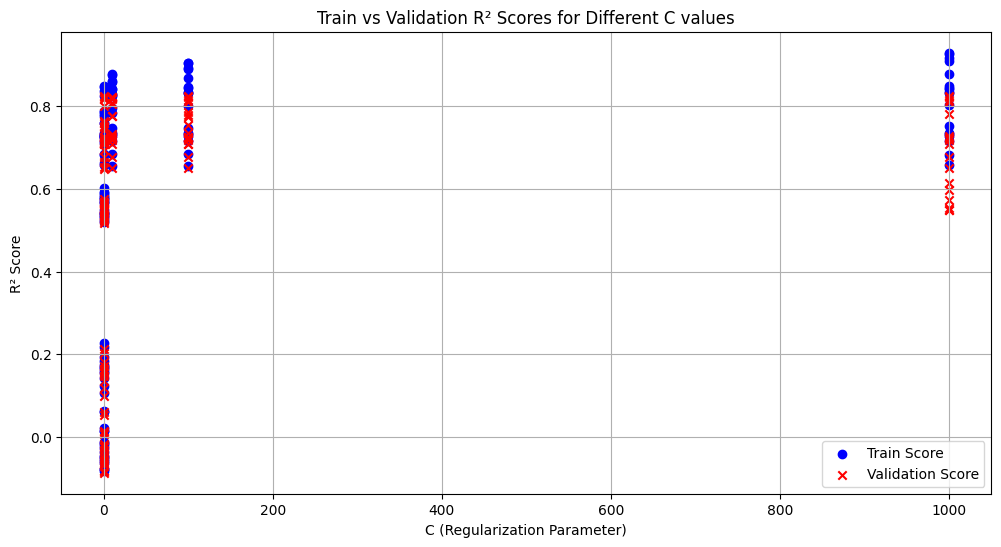

Mean Squared Error on Test Set: 15.08%
R² Score on Test Set: 85.76%
Best parameters: {'C': 1000, 'epsilon': 0.2, 'kernel': 'poly'}


In [40]:

# Initialize the SVR model
svr = SVR()

# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],               # Regularization parameter
    'epsilon': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],     # Epsilon parameter
    'kernel': ['linear', 'poly', 'rbf'],   # Different kernel types to test
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, 
                           scoring='r2', cv=5, n_jobs=-1, return_train_score=True)

# Fit GridSearchCV to the data
grid_search.fit(X_full_train, y_full_train)

print(grid_search.best_params_)

# Extract the results from the GridSearchCV object
results = grid_search.cv_results_

# Plot the R² scores for different combinations of C, epsilon, and kernel
plt.figure(figsize=(12, 6))

# Plot training scores
plt.scatter(results['param_C'], results['mean_train_score'], marker='o', label='Train Score', color='blue')

# Plot validation scores
plt.scatter(results['param_C'], results['mean_test_score'], marker='x', label='Validation Score', color='red')

plt.title("Train vs Validation R² Scores for Different C values")
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.show()

# Get the best model from GridSearchCV
best_svr = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_svr.predict(X_full_test)

# Calculate Mean Squared Error and R² on the test set
mse = mean_squared_error(y_full_test, y_pred)
r2_test = best_svr.score(X_full_test, y_full_test)

print(f"Mean Squared Error on Test Set: {mse*100:.2f}%")
print(f"R² Score on Test Set: {r2_test*100:.2f}%")
print(f"Best parameters: {grid_search.best_params_}")


<h3>We can conclude:</h3>
<ul>
<li>the selected features have the same performace as the full feature</li>
<li>Random forest gives us the better performance with parameters:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 99}</li>
</ul>